In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/P2/T1.2/Dataset/ML_train.csv')
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90439 entries, 0 to 90438
Columns: 409 entries, yellow sputum to conflicting_diseases
dtypes: int64(406), object(3)
memory usage: 282.2+ MB
None


<ipython-input-2-c1b94023f541>:3: DtypeWarning: Columns (408) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/drive/MyDrive/P2/T1.2/Dataset/ML_train.csv')


# Visualize Data Distribution

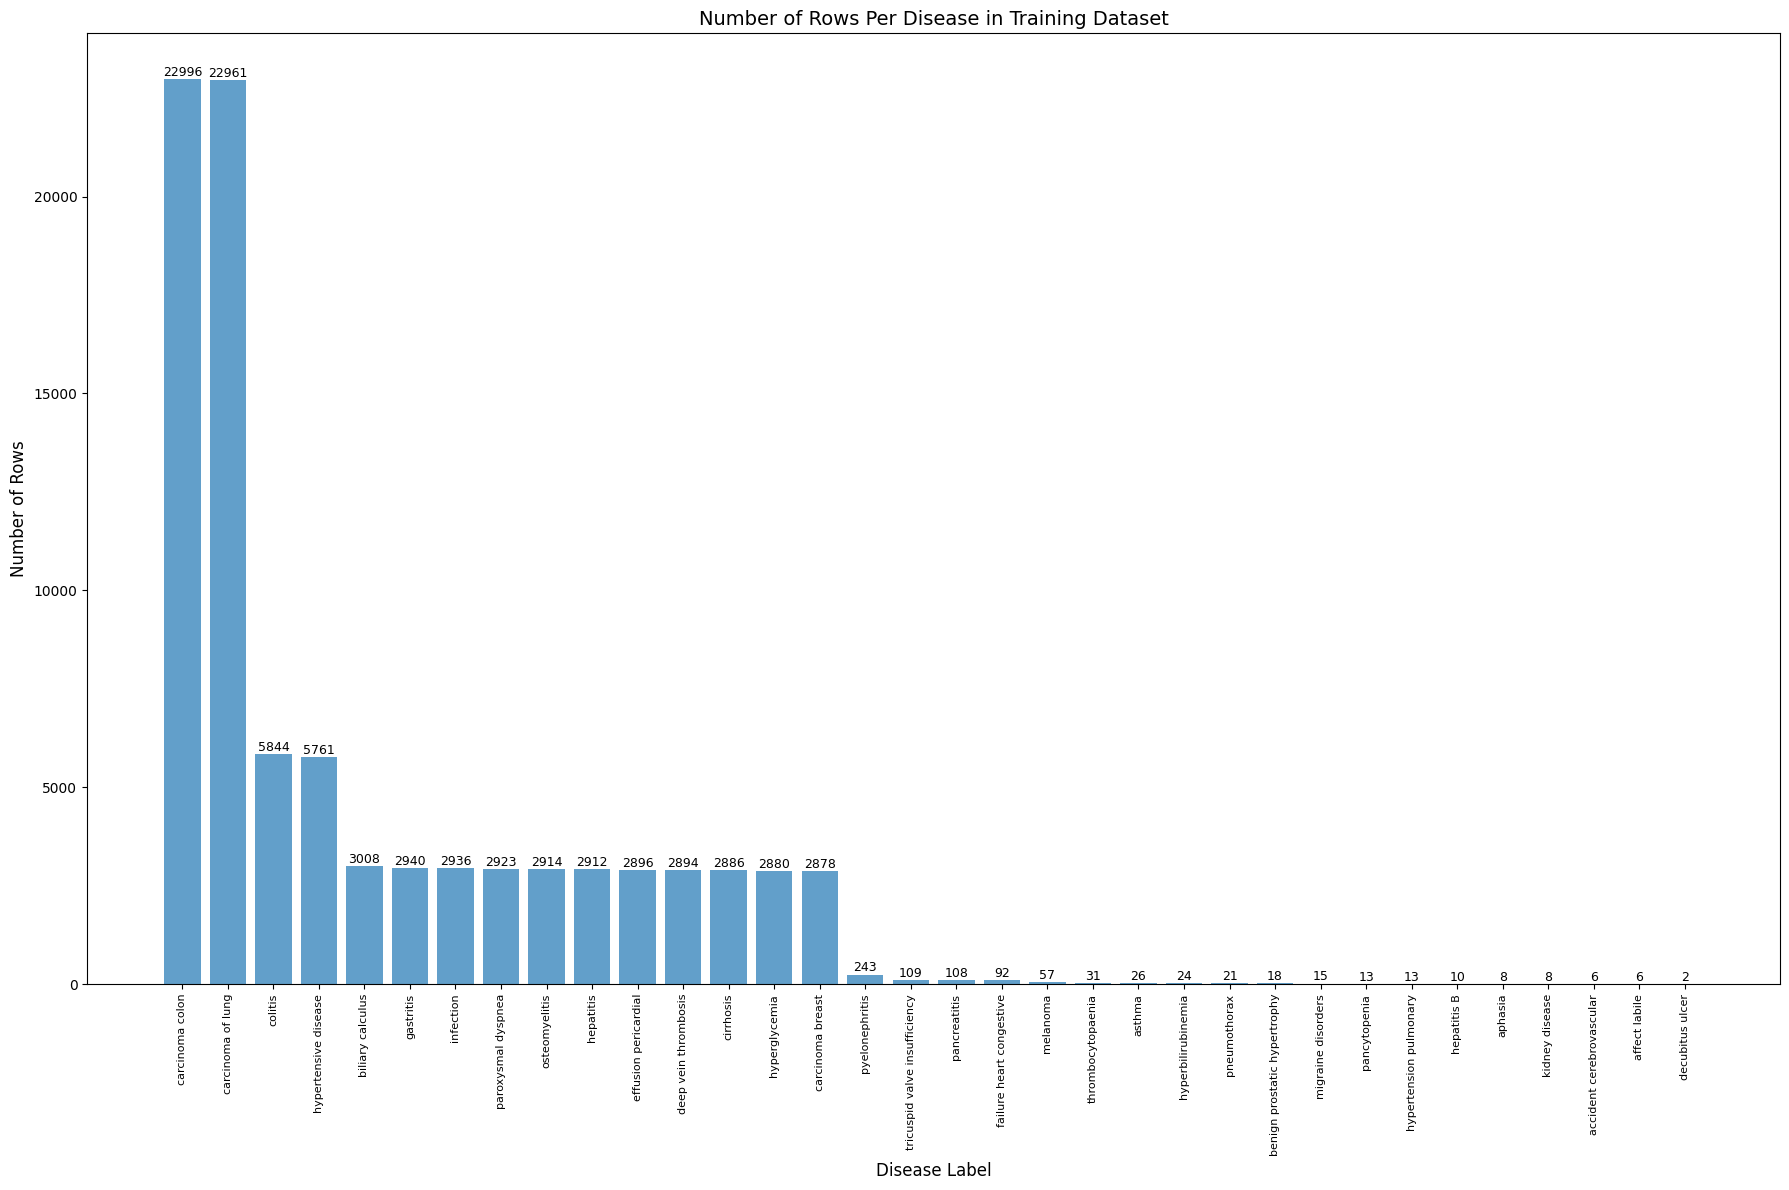

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Group the expanded dataset by disease to count rows per disease
disease_distribution = data["disease_label"].value_counts()

# Create a bar graph
plt.figure(figsize=(18, 12))
bars = plt.bar(disease_distribution.index, disease_distribution.values, alpha=0.7)

# Add row counts on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 1, f'{int(height)}', ha='center', va='bottom', fontsize=9)

# Customize the plot
plt.title("Number of Rows Per Disease in Training Dataset", fontsize=14)
plt.xlabel("Disease Label", fontsize=12)
plt.ylabel("Number of Rows", fontsize=12)
plt.xticks(rotation=90, fontsize=8)
plt.tight_layout()

# Show the plot
plt.show()

# Random Forest

In [4]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Load the datasets
train_data = pd.read_csv("/content/drive/MyDrive/P2/T1.2/Dataset/ML_train.csv")
valid_data = pd.read_csv("/content/drive/MyDrive/P2/T1.2/Dataset/ML_val.csv")
test_data = pd.read_csv("/content/drive/MyDrive/P2/T1.2/Dataset/ML_test.csv")

# Separate features and target
X_train, y_train = train_data.drop(columns=["disease_label"]), train_data["disease_label"]
X_valid, y_valid = valid_data.drop(columns=["disease_label"]), valid_data["disease_label"]
X_test, y_test = test_data.drop(columns=["disease_label"]), test_data["disease_label"]

# Ensure all feature columns are numeric
X_train = X_train.select_dtypes(include=["number"])
X_valid = X_valid.select_dtypes(include=["number"])
X_test = X_test.select_dtypes(include=["number"])

# Ensure the same columns in all splits
common_columns = X_train.columns.intersection(X_valid.columns).intersection(X_test.columns)
X_train = X_train[common_columns]
X_valid = X_valid[common_columns]
X_test = X_test[common_columns]

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Validate the Model
y_valid_pred = rf_model.predict(X_valid)
val_report = classification_report(y_valid, y_valid_pred)
print("Validation Report:")
print(val_report)

# Test the Model
y_test_pred = rf_model.predict(X_test)
test_report = classification_report(y_test, y_test_pred)
print("Test Report:")
print(test_report)


<ipython-input-4-73fd2211fe1e>:6: DtypeWarning: Columns (408) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data = pd.read_csv("/content/drive/MyDrive/P2/T1.2/Dataset/ML_train.csv")


Validation Report:
                               precision    recall  f1-score   support

     accident cerebrovascular       1.00      0.18      0.31        38
                affect labile       1.00      0.87      0.93        76
                      aphasia       0.94      0.79      0.86        38
                       asthma       1.00      0.83      0.91        76
 benign prostatic hypertrophy       0.92      0.92      0.92        76
             biliary calculus       0.89      0.98      0.93       614
             carcinoma breast       1.00      1.00      1.00       614
              carcinoma colon       1.00      1.00      1.00      4915
            carcinoma of lung       1.00      1.00      1.00      4915
                    cirrhosis       0.99      1.00      0.99       614
                      colitis       0.98      0.99      0.98      1228
              decubitus ulcer       1.00      0.50      0.67         2
         deep vein thrombosis       0.96      1.00      0

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Visualize tail-part diseases (17 disease)

<Figure size 1800x800 with 0 Axes>

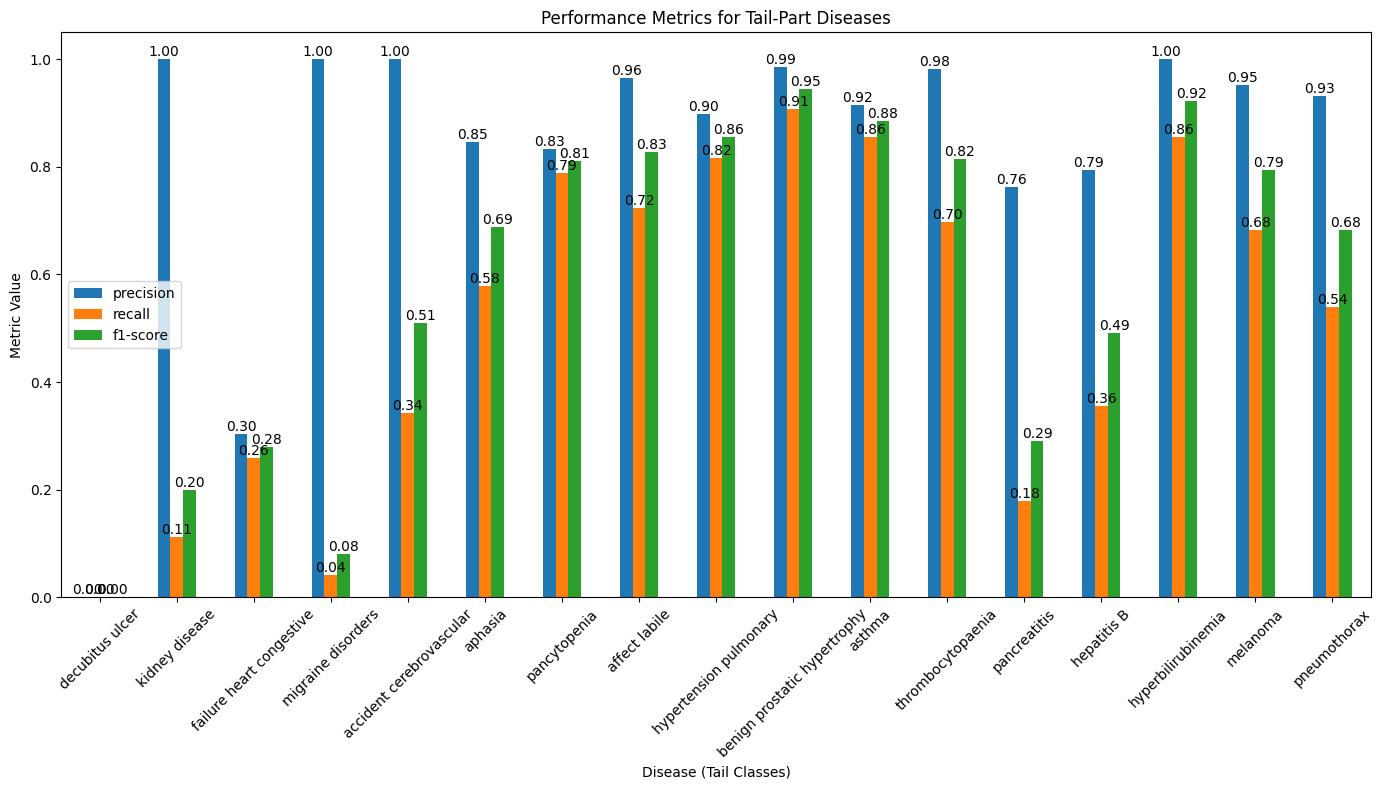

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Assuming `y_test` and `y_test_pred` are defined from the model's predictions

# Generate the classification report
report_dict = classification_report(y_test, y_test_pred, output_dict=True, zero_division=0)
report_df = pd.DataFrame(report_dict).transpose()

# Define tail-part diseases (manually based on the chart or derived from the dataset)
tail_part_diseases = [
    "decubitus ulcer", "kidney disease", "failure heart congestive", "migraine disorders", "accident cerebrovascular",
    "aphasia", "pancytopenia", "affect labile", "hypertension pulmonary", "benign prostatic hypertrophy",
    "asthma", "thrombocytopaenia", "pancreatitis", "hepatitis B", "hyperbilirubinemia",
    "melanoma", "pneumothorax"
]

# Extract metrics for tail-part diseases
tail_metrics = report_df.loc[tail_part_diseases, ["precision", "recall", "f1-score"]]

# Plot the metrics for tail-part diseases
plt.figure(figsize=(18, 8))
ax = tail_metrics.plot(kind='bar', figsize=(14, 8), legend=True)

# Annotate values on the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10)

# Add titles and labels
plt.title("Performance Metrics for Tail-Part Diseases")
plt.xlabel("Disease (Tail Classes)")
plt.ylabel("Metric Value")
plt.xticks(rotation=45)
plt.legend(loc='best')
plt.tight_layout()
plt.show()


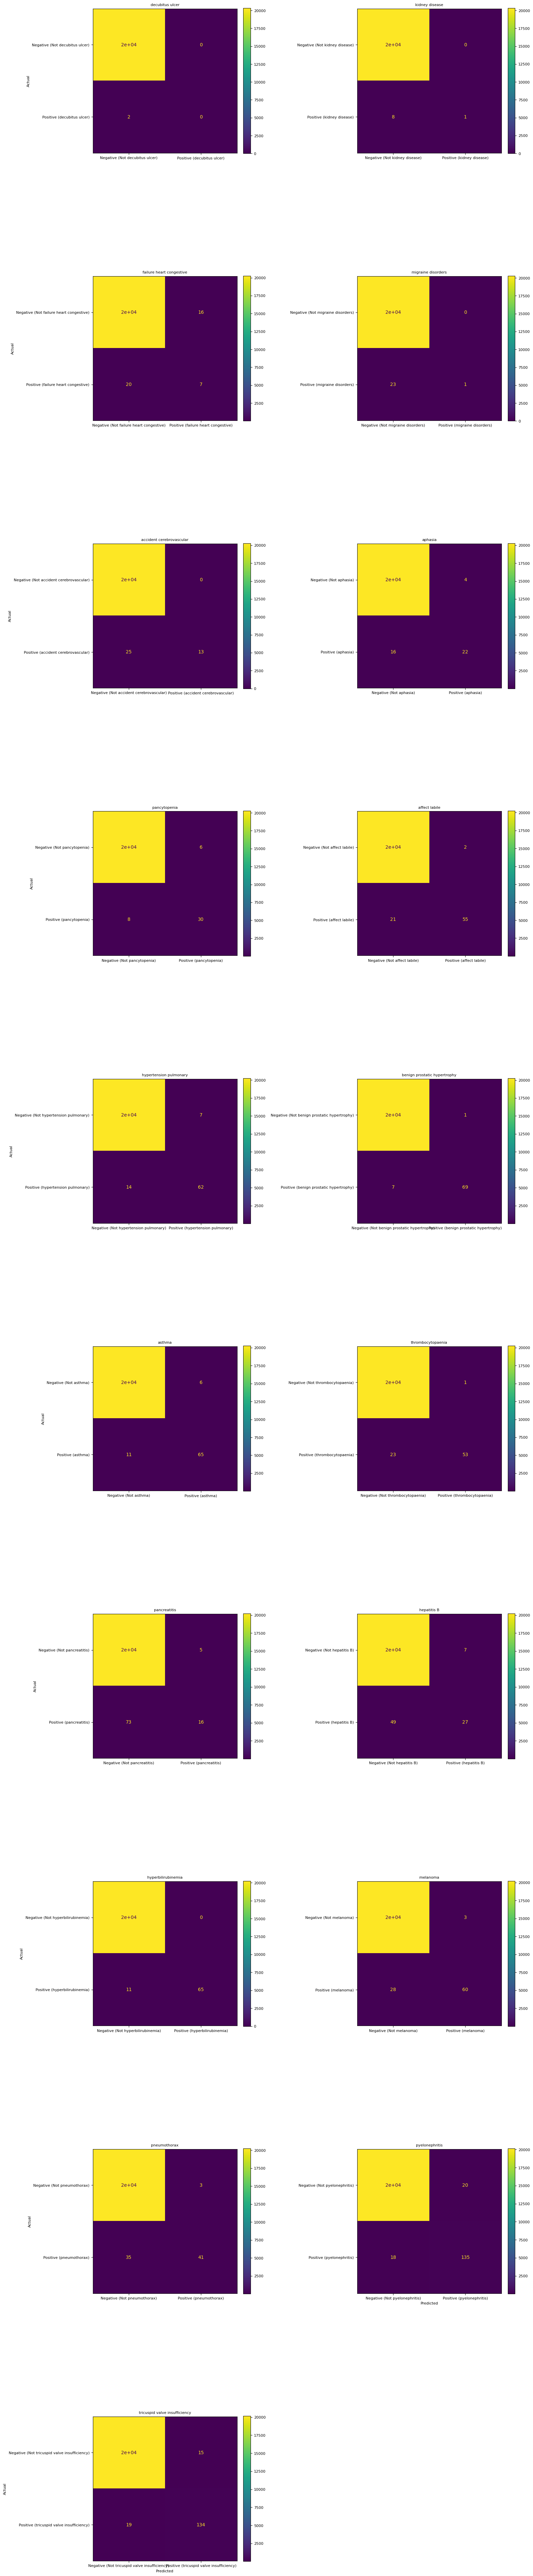

In [6]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Define the tail-part diseases
tail_part_diseases = [
    "decubitus ulcer", "kidney disease", "failure heart congestive", "migraine disorders", "accident cerebrovascular",
    "aphasia", "pancytopenia", "affect labile", "hypertension pulmonary", "benign prostatic hypertrophy",
    "asthma", "thrombocytopaenia", "pancreatitis", "hepatitis B", "hyperbilirubinemia",
    "melanoma", "pneumothorax", "pyelonephritis", "tricuspid valve insufficiency"
]

# Plot settings
num_plots_per_row = 2
plot_size = (8, 8)

# Initialize plot count
plt.figure(figsize=(plot_size[0] * num_plots_per_row, plot_size[1] * ((len(tail_part_diseases) + num_plots_per_row - 1) // num_plots_per_row)))

# Loop through each disease in the tail_part_diseases list
for i, disease in enumerate(tail_part_diseases):
    # Filter test data for the current disease
    y_test_binary = (y_test == disease).astype(int)  # 1 if the disease matches, 0 otherwise
    y_pred_binary = (y_test_pred == disease).astype(int)

    # Compute the confusion matrix
    cm = confusion_matrix(y_test_binary, y_pred_binary, labels=[0, 1])

    # Plot the confusion matrix
    ax = plt.subplot((len(tail_part_diseases) + num_plots_per_row - 1) // num_plots_per_row, num_plots_per_row, i + 1)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative (Not " + disease + ")", "Positive (" + disease + ")"])
    disp.plot(cmap='viridis', xticks_rotation='horizontal', ax=ax, colorbar=False)
    cbar = plt.colorbar(disp.im_, ax=ax, fraction=0.046, pad=0.04)
    cbar.ax.tick_params(labelsize=8)
    ax.set_title(f"{disease}", fontsize=8)
    ax.tick_params(axis='x', labelsize=8)
    ax.tick_params(axis='y', labelsize=8)
    ax.set_xlabel("Predicted", fontsize=8)
    ax.set_ylabel("Actual", fontsize=8)
    if i % num_plots_per_row != 0:
        ax.set_ylabel('')
    if i < len(tail_part_diseases) - num_plots_per_row:
        ax.set_xlabel('')

plt.tight_layout()
plt.show()


# Visualize the head-part disease ( 17 diseases)

<Figure size 1800x800 with 0 Axes>

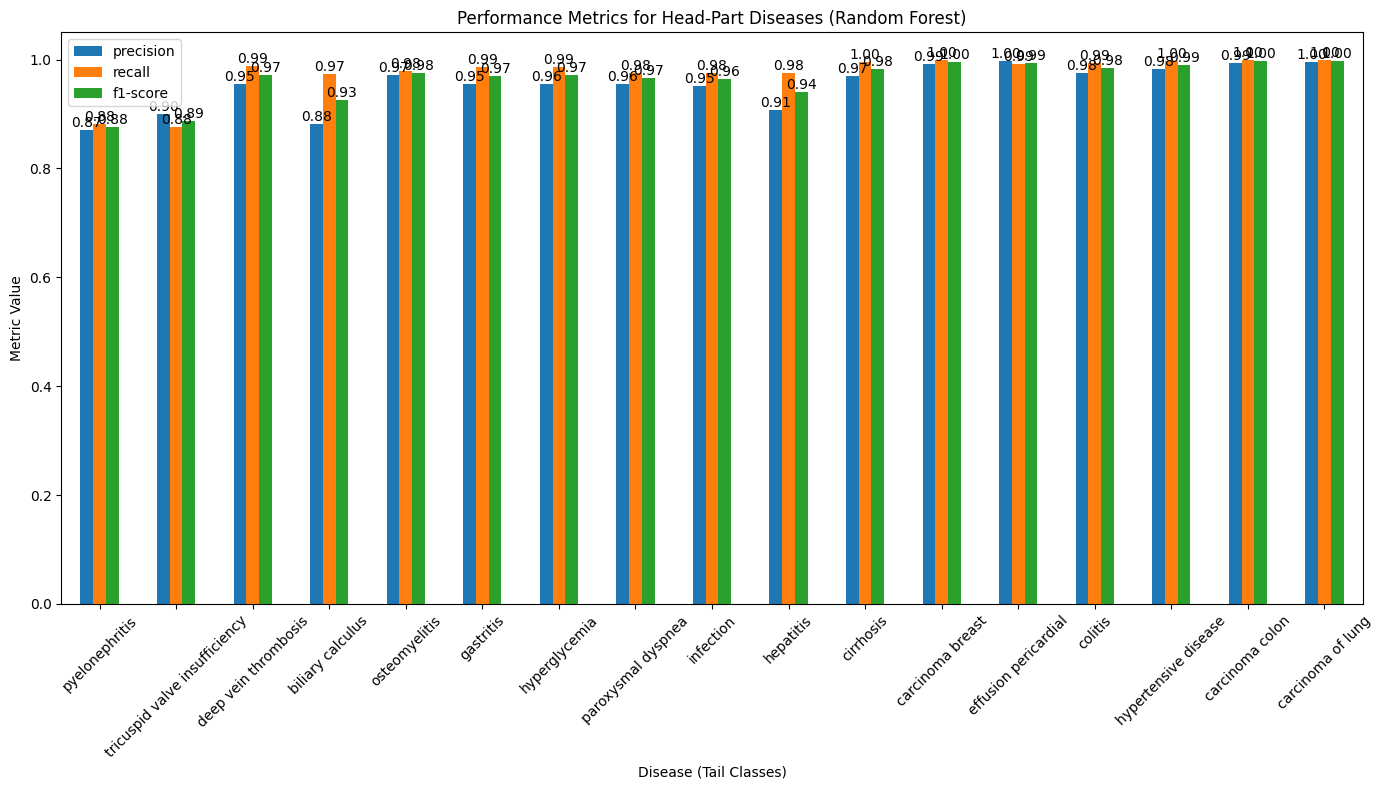

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Assuming `y_test` and `y_test_pred` are defined from the model's predictions

# Generate the classification report
report_dict = classification_report(y_test, y_test_pred, output_dict=True, zero_division=0)
report_df = pd.DataFrame(report_dict).transpose()

# Define tail-part diseases (manually based on the chart or derived from the dataset)
head_part_diseases = [
    "pyelonephritis", "tricuspid valve insufficiency", "deep vein thrombosis", "biliary calculus", "osteomyelitis",
    "gastritis", "hyperglycemia", "paroxysmal dyspnea", "infection", "hepatitis",
    "cirrhosis", "carcinoma breast", "effusion pericardial", "colitis", "hypertensive disease",
    "carcinoma colon", "carcinoma of lung"
]

# Extract metrics for tail-part diseases
tail_metrics = report_df.loc[head_part_diseases, ["precision", "recall", "f1-score"]]

# Plot the metrics for tail-part diseases
plt.figure(figsize=(18, 8))
ax = tail_metrics.plot(kind='bar', figsize=(14, 8), legend=True)

# Annotate values on the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10)

# Add titles and labels
plt.title("Performance Metrics for Head-Part Diseases (Random Forest)")
plt.xlabel("Disease (Tail Classes)")
plt.ylabel("Metric Value")
plt.xticks(rotation=45)
plt.legend(loc='best')
plt.tight_layout()
plt.show()


In [8]:
feature_importance = pd.Series(rf_model.feature_importances_, index=X_train.columns)
print(feature_importance.sort_values(ascending=False).head(10))  # Top 10 important features

hyperemesis           0.026822
agitation             0.025744
gurgle                0.024941
general discomfort    0.023961
debilitation          0.022262
haemoptysis           0.021038
constipation          0.020214
prostatism            0.019870
shooting pain         0.019136
dizzy spells          0.018777
dtype: float64


# Saved the predicted out in csv

In [9]:
"""
import pandas as pd

# Combine the real labels, predicted labels, and optionally the testing features
results = pd.DataFrame({
    "Real Label": y_test.values,
    "Predicted Label": y_pred
})

# Optionally, include testing features for context
testing_features = X_test.reset_index(drop=True)  # Reset index to align with predictions
results_with_features = pd.concat([testing_features, results], axis=1)

# Save results to a CSV file
results_with_features.to_csv("/content/drive/MyDrive/P2/Dataset/DiseasePrediction2/RFpredicted_output.csv", index=False)

print("Predicted output saved to 'predicted_output.csv'")
"""

'\nimport pandas as pd\n\n# Combine the real labels, predicted labels, and optionally the testing features\nresults = pd.DataFrame({\n    "Real Label": y_test.values,\n    "Predicted Label": y_pred\n})\n\n# Optionally, include testing features for context\ntesting_features = X_test.reset_index(drop=True)  # Reset index to align with predictions\nresults_with_features = pd.concat([testing_features, results], axis=1)\n\n# Save results to a CSV file\nresults_with_features.to_csv("/content/drive/MyDrive/P2/Dataset/DiseasePrediction2/RFpredicted_output.csv", index=False)\n\nprint("Predicted output saved to \'predicted_output.csv\'")\n'

# Generate Classification Report

In [10]:

import pandas as pd
from sklearn.metrics import classification_report

# Assuming rf_model is your trained model, and X_test, y_test are defined
y_pred = rf_model.predict(X_test)

# Generate the classification report as a dictionary
report_dict = classification_report(y_test, y_pred, output_dict=True, zero_division=0)

# Convert the dictionary to a pandas DataFrame
report_df = pd.DataFrame(report_dict).transpose()

# Save the classification report as a CSV file
report_df.to_csv("/content/drive/MyDrive/P2/T1.2/Dataset/ML/RF-lt-class.csv", index=True)

print("Classification report saved.")


Classification report saved.
